# Projet OLIST
## Notebook de modélisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from numpy import unique
from numpy import where

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA
from matplotlib.patches import Circle

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold
from sklearn import cluster
from sklearn import decomposition
from sklearn import metrics

from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


from sklearn.cluster import KMeans

# 1. Chargement des données 

In [2]:
# data = pd.read_csv('data_cleaned.csv',index_col='customer_id')
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'customer_id', 'region', 'payment_sequential',
       'payment_installments', 'nb_product', 'best_category',
       'orders_tot_amount', 'freight_tot_value', 'review_mean_score',
       'prefered_payment_type', 'customer_seniority', 'delivery_delay'],
      dtype='object')

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
data.head()

,customer_id,region,payment_sequential,payment_installments,nb_product,best_category,orders_tot_amount,freight_tot_value,review_mean_score,prefered_payment_type,customer_seniority,delivery_delay
0,06b8999e2fba1a1fbc88172c00ba8bc7,sud_est,1,2,1,office,124.99,21.88,4.0,credit_card,571,8
1,8912fc0c3bbf1e2fbf35819e21706718,nord,1,1,2,office,225.98,49.80,1.0,credit_card,453,18
2,8912fc0c3bbf1e2fbf35819e21706718,nord,1,1,2,office,225.98,49.80,1.0,credit_card,453,18
3,8912fc0c3bbf1e2fbf35819e21706718,nord,1,1,2,office,225.98,49.80,1.0,credit_card,453,18
4,8912fc0c3bbf1e2fbf35819e21706718,nord,1,1,2,office,225.98,49.80,1.0,credit_card,453,18


In [6]:
data.shape

(287477, 12)

In [7]:
data_reduced = data.sample(10000, random_state=1).copy()

In [8]:
X = data_reduced.drop('customer_id',axis=1)

# 2. Préparation des données

### 2.1. Label Encoding des variables catégorielles

In [9]:
def Label_Encoder(df):
    
    labelEnc=preprocessing.LabelEncoder()
    catagorical_columns = df.select_dtypes(['bool','object']).columns.tolist()
    
    for col in catagorical_columns:
        df[col]=labelEnc.fit_transform(df[col])
        
    return df

In [10]:
Label_Encoder(X)

,region,payment_sequential,payment_installments,nb_product,best_category,orders_tot_amount,freight_tot_value,review_mean_score,prefered_payment_type,customer_seniority,delivery_delay
133584,4,1,1,1,8,41.99,19.32,3.0,1,262,12
85546,4,1,1,6,8,780.00,140.94,1.0,0,192,13
90950,3,1,3,4,8,95.96,108.32,5.0,1,64,15
376,4,2,1,3,9,527.70,91.08,4.0,3,306,70
164312,0,3,1,24,2,359.76,529.44,3.0,3,3,20
...,...,...,...,...,...,...,...,...,...,...,...
125909,3,1,2,1,8,39.90,16.11,4.0,1,501,7
209478,2,1,1,1,7,24.90,22.06,4.0,1,262,6
136572,4,1,2,4,8,146.00,62.24,5.0,1,631,7
162160,4,1,2,1,10,34.90,15.79,5.0,1,294,8


### 2.2. Standard-scaler des variables numériques

In [11]:
def standard_scaler(df):
    ss = StandardScaler()
    numerical_columns = df.select_dtypes(['float64','int64']).columns
    for col in numerical_columns:
        df[numerical_columns] = ss.fit_transform(df[numerical_columns])
    return df

In [12]:
standard_scaler(X)

,region,payment_sequential,payment_installments,nb_product,best_category,orders_tot_amount,freight_tot_value,review_mean_score,prefered_payment_type,customer_seniority,delivery_delay
133584,4,-0.407586,-0.563133,-0.558485,8,-0.465904,-0.474933,-0.600364,1,-0.477926,0.029305
85546,4,-0.407586,-0.563133,-0.065124,8,0.076740,-0.038287,-1.948890,0,-0.873474,0.143066
90950,3,-0.407586,0.156342,-0.262468,8,-0.426221,-0.155401,0.748162,1,-1.596763,0.370589
376,4,-0.085384,-0.563133,-0.361141,9,-0.108771,-0.217297,0.073899,3,-0.229296,6.627467
164312,0,0.236819,-0.563133,1.710978,2,-0.232254,1.356522,-0.600364,3,-1.941455,0.939396
...,...,...,...,...,...,...,...,...,...,...,...
125909,3,-0.407586,-0.203395,-0.558485,8,-0.467440,-0.486457,0.073899,1,0.872588,-0.539502
209478,2,-0.407586,-0.563133,-0.558485,7,-0.478469,-0.465095,0.073899,1,-0.477926,-0.653264
136572,4,-0.407586,-0.203395,-0.262468,8,-0.389427,-0.320839,0.748162,1,1.607178,-0.539502
162160,4,-0.407586,-0.203395,-0.558485,10,-0.471117,-0.487606,0.748162,1,-0.297104,-0.425741


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 133584 to 23890
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   region                 10000 non-null  int32  
 1   payment_sequential     10000 non-null  float64
 2   payment_installments   10000 non-null  float64
 3   nb_product             10000 non-null  float64
 4   best_category          10000 non-null  int32  
 5   orders_tot_amount      10000 non-null  float64
 6   freight_tot_value      10000 non-null  float64
 7   review_mean_score      10000 non-null  float64
 8   prefered_payment_type  10000 non-null  int32  
 9   customer_seniority     10000 non-null  float64
 10  delivery_delay         10000 non-null  float64
dtypes: float64(8), int32(3)
memory usage: 820.3 KB


## 2.3 Réduction de dimension

### 2.3.1. PCA

In [14]:
pca = PCA(random_state=1)

In [15]:
pca.fit(X)

PCA(random_state=1)

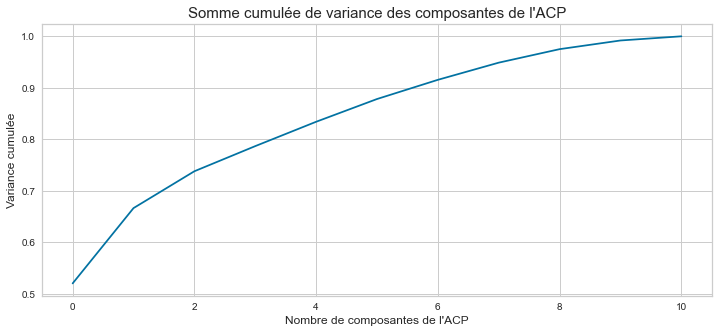

In [16]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP',size=15)
plt.xlabel('Nombre de composantes de l\'ACP', size=12)
plt.ylabel('Variance cumulée', size=12)
plt.plot(list(range(X.shape[1])),
         np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)
plt.show()

In [17]:
 np.cumsum(pca.explained_variance_ratio_)

array([0.5202895 , 0.66645988, 0.73801336, 0.78681129, 0.83408289,
       0.8782437 , 0.91552997, 0.94885845, 0.97506978, 0.99189116,
       1.        ])

In [18]:
# Selection des colonnes
colonnes_pca = X.select_dtypes(['float64','int64','int32']).columns

In [19]:
colonnes_pca

Index(['region', 'payment_sequential', 'payment_installments', 'nb_product',
       'best_category', 'orders_tot_amount', 'freight_tot_value',
       'review_mean_score', 'prefered_payment_type', 'customer_seniority',
       'delivery_delay'],
      dtype='object')

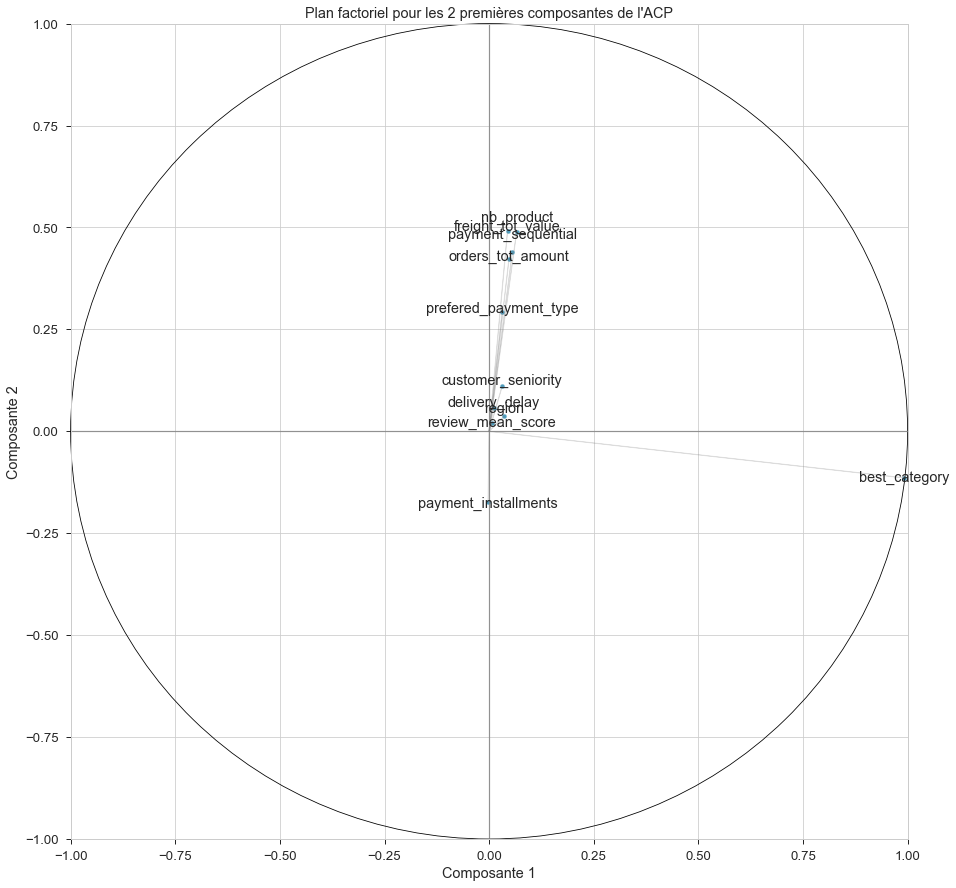

In [20]:
# Affichage du plan factoriel pour les 2 premières composantes de l'ACP
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
# Tracage du cercle
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', 
                    clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
# Afficher un ligne horizontale
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
# Afficher un ligne verticale
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',
             alpha=0.2)


sns.set_context("paper", font_scale=1)

In [39]:
pca = PCA(n_components=min(X.shape[0],X.shape[1]))
d=pca.fit_transform(X)

scree = pca.explained_variance_ratio_
nbr_pca=0
N=110
for i in range(N):
    a = scree.cumsum()[i]
    if a >= 0.95:
        print("{} principal components explain at least 95% of the total variance".format(i))
        print("Exact value of variance explained: {}%".format(round(a*100,2)))
        nbr_pca=i
        break
pca = PCA(n_components=nbr_pca)
d=pca.fit_transform(X)

data_pca=pd.DataFrame(d)
col=["pca "+ str(n+1) for n in data_pca.columns]
data_pca.columns=col
data_pca.head()

8 principal components explain at least 80% of the total variance
Exact value of variance explained: 97.51%


,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,pca 8
0,1.763834,-1.155267,-0.265811,0.441114,0.171233,-1.047872,0.123360,-0.114050
1,1.790245,-0.827001,0.467512,1.705688,0.471570,-1.448624,0.813087,-0.924119
2,1.738318,-1.077847,0.180089,0.263839,-1.499564,-0.163302,0.666200,0.732781
3,2.958711,0.246961,3.099832,-1.150542,1.462706,-2.542928,0.875970,4.918291
4,-4.034328,2.246365,2.785796,-0.070124,-2.940994,-0.899432,-1.024452,0.305453


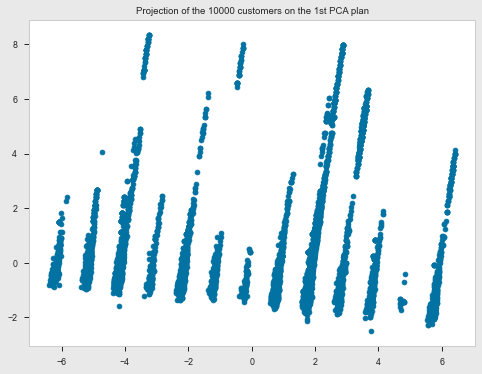

In [40]:
# Affichage des données sur les 2 composantes principales de la PCA
fig=plt.figure(figsize=[8,6])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Projection of the {} customers on the 1st PCA plan".format(data_pca.shape[0]))
plt.scatter(data=data_pca,x="pca 1",y="pca 2")
plt.grid()

### 2.3.2. T-SNE

In [21]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X.copy())

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


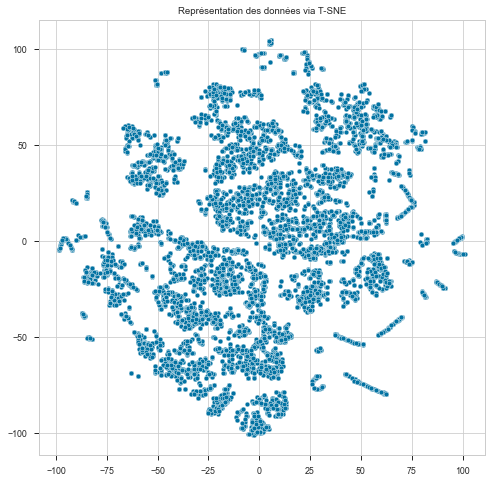

In [22]:
plt.figure(figsize=(8,8))
plt.title('Représentation des données via T-SNE')
sns.scatterplot(T[:,0], T[:,1])
plt.show()

# 3. Clustering

## 3.1. K-MEANS

### 3.1.1. Score de distortion en fonction du nombre de clusters

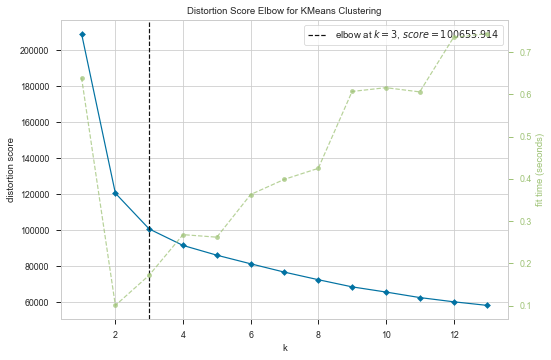

In [23]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,14))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof() # Draw/show/poof the data
plt.show()

### 3.1.2. calinski_harabasz Score en fonction du nombre de clusters

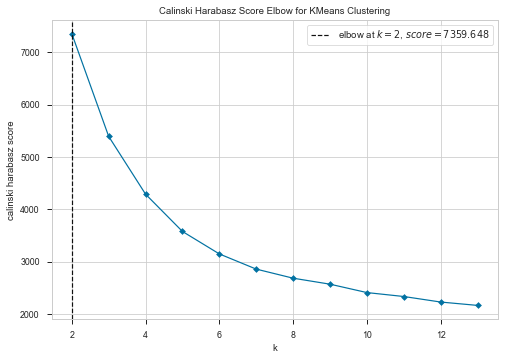

In [24]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,14), metric='calinski_harabasz', timings=False)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

### 3.1.3 Silouette visualizer

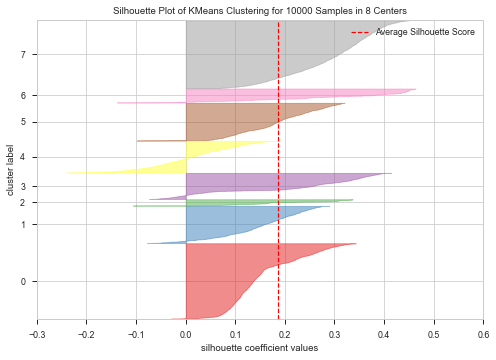

In [25]:
# Instantiate the clustering model and visualizer for 8 clusters
model = KMeans(8)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

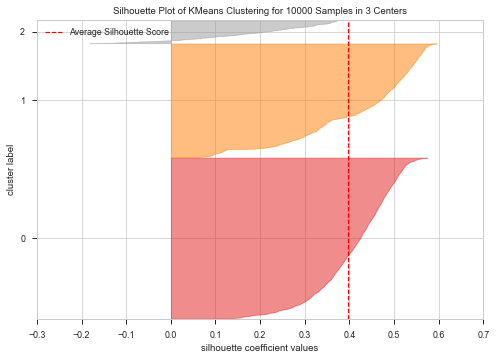

In [26]:
# Instantiate the clustering model and visualizer for 3 clusters
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

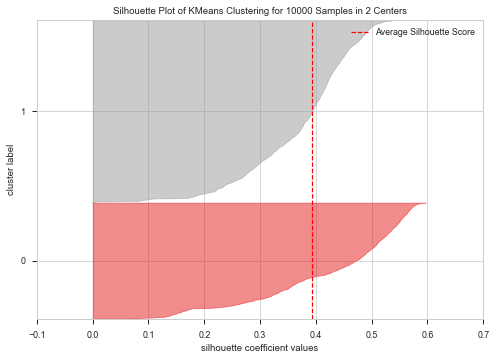

In [27]:
# Instantiate the clustering model and visualizer for 2 clusters
model = KMeans(2)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
plt.show()

### 3.2.1. Fine tuning des hyperparamètres

In [28]:
%%time

parameters = {
    'init' : ["k-means++","random"],
    'n_clusters':[2,3,4,5],
    'n_init':[10,20,30],
    'max_iter':[20,50,100],
    
    
}
kmeans = GridSearchCV(KMeans(n_jobs=-1,random_state=42),
                        param_grid = parameters,
                        verbose=5)
kmeans.fit(X)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=10 ............
[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=10, score=-24827.685, total=   0.1s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=10 ............
[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=10, score=-24319.300, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=10 ............
[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=10, score=-23703.194, total=   0.1s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=10 ............
[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=10, score=-23777.348, total=   0.1s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=10 ............
[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=10, score=-23964.924, total=   0.1s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=20 ............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=20, score=-24827.685, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=20 ............
[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=20, score=-24319.300, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=20, score=-23703.194, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=20 ............
[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=20, score=-23777.348, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=20, score=-23964.924, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=30, score=-24827.685, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=30, score=-24319.300, total=   0.3s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=30, score=-23703.194, total=   0.3s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=30, score=-23777.348, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=2, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=2, n_init=30, score=-23964.924, total=   0.3s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=10 ............
[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=10, score=-20924.650, total=   0.1s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=10, score=-20131.086, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=10 ............
[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=10, score=-19943.318, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=10, score=-19704.708, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=10 ............
[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=10, score=-20028.442, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=20, score=-20924.650, total=   0.4s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=20, score=-20129.713, total=   0.4s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=20, score=-19943.318, total=   0.4s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=20, score=-19704.708, total=   0.3s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=20, score=-20028.442, total=   0.3s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=30, score=-20924.650, total=   0.4s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=30, score=-20130.668, total=   0.5s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=30, score=-19943.318, total=   0.5s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=30, score=-19704.708, total=   0.5s
[CV] init=k-means++, max_iter=20, n_clusters=3, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=3, n_init=30, score=-20028.442, total=   0.4s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=10, score=-19114.760, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=10, score=-18082.647, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=10, score=-18150.576, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=10 ............
[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=10, score=-18014.035, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=10 ............
[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=10, score=-18235.836, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=20, score=-19116.038, total=   0.4s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=20, score=-18079.995, total=   0.4s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=20, score=-18150.576, total=   0.4s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=20, score=-18014.035, total=   0.4s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=20, score=-18235.836, total=   0.4s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=30, score=-19115.740, total=   0.6s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=30, score=-18079.995, total=   0.6s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=30, score=-18150.614, total=   0.6s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=30, score=-18014.035, total=   0.6s
[CV] init=k-means++, max_iter=20, n_clusters=4, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=4, n_init=30, score=-18235.836, total=   0.6s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=10, score=-17998.113, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=10, score=-17008.369, total=   0.3s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=10, score=-17075.987, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=10, score=-16947.862, total=   0.2s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=10, score=-17154.244, total=   0.3s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=20, score=-17998.113, total=   0.5s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=20, score=-17008.369, total=   0.5s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=20, score=-17075.987, total=   0.5s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=20, score=-16947.862, total=   0.5s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=20, score=-17154.244, total=   0.5s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=30, score=-17999.175, total=   0.7s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=30, score=-17008.369, total=   0.8s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=30, score=-17075.987, total=   0.7s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=30, score=-16947.862, total=   0.7s
[CV] init=k-means++, max_iter=20, n_clusters=5, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=20, n_clusters=5, n_init=30, score=-17154.244, total=   0.7s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=10 ............
[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=10, score=-24827.685, total=   0.1s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=10 ............
[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=10, score=-24319.300, total=   0.1s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=10 ............
[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=10, score=-23703.194, total=   0.1s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=10 ............
[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=10, score=-23777.348, total=   0.1s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=10 ............
[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=10, score=-23964.924, total=   0.1s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=20, score=-24827.685, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=20 ............
[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=20, score=-24319.300, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=20, score=-23703.194, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=20 ............
[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=20, score=-23777.348, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=20, score=-23964.924, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=30, score=-24827.685, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=30, score=-24319.300, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=30, score=-23703.194, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=30, score=-23777.348, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=2, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=2, n_init=30, score=-23964.924, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=10 ............
[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=10, score=-20924.650, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=10, score=-20131.086, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=10 ............
[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=10, score=-19943.318, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=10, score=-19704.708, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=10 ............
[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=10, score=-20028.442, total=   0.1s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=20, score=-20924.650, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=20, score=-20129.713, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=20, score=-19943.318, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=20, score=-19704.708, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=20, score=-20028.442, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=30, score=-20924.650, total=   0.5s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=30, score=-20130.668, total=   0.5s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=30, score=-19943.318, total=   0.4s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=30, score=-19704.708, total=   0.4s
[CV] init=k-means++, max_iter=50, n_clusters=3, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=3, n_init=30, score=-20028.442, total=   0.4s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=10, score=-19114.760, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=10, score=-18082.647, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=10, score=-18150.576, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=10, score=-18014.035, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=10, score=-18235.836, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=20, score=-19116.038, total=   0.4s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=20, score=-18079.995, total=   0.4s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=20, score=-18150.576, total=   0.4s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=20, score=-18014.035, total=   0.4s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=20, score=-18235.836, total=   0.4s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=30, score=-19115.740, total=   0.6s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=30, score=-18079.995, total=   0.6s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=30, score=-18150.614, total=   0.6s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=30, score=-18014.035, total=   0.6s
[CV] init=k-means++, max_iter=50, n_clusters=4, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=4, n_init=30, score=-18235.836, total=   0.6s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=10, score=-17998.113, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=10, score=-17008.369, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=10, score=-17075.987, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=10, score=-16947.862, total=   0.2s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=10 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=10, score=-17154.244, total=   0.3s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=20, score=-17998.113, total=   0.5s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=20, score=-17005.756, total=   0.5s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=20, score=-17075.987, total=   0.5s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=20, score=-16947.862, total=   0.5s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=20 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=20, score=-17154.244, total=   0.5s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=30, score=-17999.175, total=   0.7s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=30, score=-17005.756, total=   0.8s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=30, score=-17075.987, total=   0.7s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=30, score=-16947.862, total=   0.8s
[CV] init=k-means++, max_iter=50, n_clusters=5, n_init=30 ............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=50, n_clusters=5, n_init=30, score=-17154.244, total=   0.8s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=10 ...........
[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=10, score=-24827.685, total=   0.1s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=10 ...........
[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=10, score=-24319.300, total=   0.1s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=10 ...........
[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=10, score=-23703.194, total=   0.1s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=10 ...........
[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=10, score=-23777.348, total=   0.1s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=10 ...........
[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=10, score=-23964.924, total=   0.1s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=20, score=-24827.685, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=20 ...........
[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=20, score=-24319.300, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=20, score=-23703.194, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=20 ...........
[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=20, score=-23777.348, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=20, score=-23964.924, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=30, score=-24827.685, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=30, score=-24319.300, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=30, score=-23703.194, total=   0.3s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=30, score=-23777.348, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=2, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=2, n_init=30, score=-23964.924, total=   0.3s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=10 ...........
[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=10, score=-20924.650, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=10, score=-20131.086, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=10 ...........
[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=10, score=-19943.318, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=10 ...........

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=10, score=-19704.708, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=10, score=-20028.442, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=20, score=-20924.650, total=   0.4s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=20, score=-20129.713, total=   0.4s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=20, score=-19943.318, total=   0.4s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=20, score=-19704.708, total=   0.3s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=20, score=-20028.442, total=   0.3s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=30, score=-20924.650, total=   0.5s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=30, score=-20130.668, total=   0.6s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=30, score=-19943.318, total=   0.4s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=30, score=-19704.708, total=   0.4s
[CV] init=k-means++, max_iter=100, n_clusters=3, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=3, n_init=30, score=-20028.442, total=   0.4s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=10, score=-19114.760, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=10, score=-18082.647, total=   0.3s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=10, score=-18150.576, total=   0.3s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=10, score=-18014.035, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=10, score=-18235.836, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=20, score=-19116.038, total=   0.4s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=20, score=-18079.995, total=   0.4s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=20, score=-18150.576, total=   0.5s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=20, score=-18014.035, total=   0.4s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=20, score=-18235.836, total=   0.4s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=30, score=-19115.740, total=   0.6s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=30, score=-18079.995, total=   0.6s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=30, score=-18150.614, total=   0.6s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=30, score=-18014.035, total=   0.6s
[CV] init=k-means++, max_iter=100, n_clusters=4, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=4, n_init=30, score=-18235.836, total=   0.6s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=10, score=-17998.113, total=   0.3s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=10, score=-17008.369, total=   0.3s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=10, score=-17075.987, total=   0.2s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=10, score=-16947.862, total=   0.3s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=10 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=10, score=-17154.244, total=   0.3s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=20, score=-17998.113, total=   0.5s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=20, score=-17005.756, total=   0.5s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=20, score=-17075.987, total=   0.5s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=20, score=-16947.862, total=   0.5s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=20 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=20, score=-17154.244, total=   0.5s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=30, score=-17999.175, total=   0.8s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=30, score=-17005.756, total=   0.8s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=30, score=-17075.987, total=   0.7s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=30, score=-16947.862, total=   0.7s
[CV] init=k-means++, max_iter=100, n_clusters=5, n_init=30 ...........


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=k-means++, max_iter=100, n_clusters=5, n_init=30, score=-17154.244, total=   0.8s
[CV] init=random, max_iter=20, n_clusters=2, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=2, n_init=10, score=-24827.685, total=   0.1s
[CV] init=random, max_iter=20, n_clusters=2, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=2, n_init=10, score=-24319.300, total=   0.1s
[CV] init=random, max_iter=20, n_clusters=2, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240

[CV]  init=random, max_iter=20, n_clusters=2, n_init=10, score=-23703.194, total=   0.1s
[CV] init=random, max_iter=20, n_clusters=2, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=2, n_init=10, score=-23777.348, total=   0.1s
[CV] init=random, max_iter=20, n_clusters=2, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=2, n_init=10, score=-23964.924, total=   0.1s
[CV] init=random, max_iter=20, n_clusters=2, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=2, n_init=20, score=-24827.685, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=2, n_init=20 ...............
[CV]  init=random, max_iter=20, n_clusters=2, n_init=20, score=-24319.300, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=2, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=2, n_init=20, score=-23703.194, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=2, n_init=20 ...............
[CV]  init=random, max_iter=20, n_clusters=2, n_init=20, score=-23777.348, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=2, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=2, n_init=20, score=-23964.924, total=   0.1s
[CV] init=random, max_iter=20, n_clusters=2, n_init=30 ...............
[CV]  init=random, max_iter=20, n_clusters=2, n_init=30, score=-24827.685, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=2, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=2, n_init=30, score=-24319.300, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=2, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=2, n_init=30, score=-23703.194, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=2, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=2, n_init=30, score=-23777.348, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=2, n_init=30 ...............
[CV]  init=random, max_iter=20, n_clusters=2, n_init=30, score=-23964.924, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=20, n_clusters=3, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=3, n_init=10, score=-20924.650, total=   0.1s
[CV] init=random, max_iter=20, n_clusters=3, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=10, score=-20131.086, total=   0.1s
[CV] init=random, max_iter=20, n_clusters=3, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=3, n_init=10, score=-19943.318, total=   0.1s
[CV] init=random, max_iter=20, n_clusters=3, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=10, score=-19704.708, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=3, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=3, n_init=10, score=-20028.442, total=   0.1s
[CV] init=random, max_iter=20, n_clusters=3, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=20, score=-20924.650, total=   0.3s
[CV] init=random, max_iter=20, n_clusters=3, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=20, score=-20131.086, total=   0.3s
[CV] init=random, max_iter=20, n_clusters=3, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=20, score=-19943.318, total=   0.3s
[CV] init=random, max_iter=20, n_clusters=3, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=20, score=-19704.708, total=   0.3s
[CV] init=random, max_iter=20, n_clusters=3, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=20, score=-20028.442, total=   0.3s
[CV] init=random, max_iter=20, n_clusters=3, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=30, score=-20924.650, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=3, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=30, score=-20131.086, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=3, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=30, score=-19943.318, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=3, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=30, score=-19704.708, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=3, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=3, n_init=30, score=-20028.442, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=4, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=4, n_init=10, score=-19115.740, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=4, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=10, score=-18079.995, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=4, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=4, n_init=10, score=-18150.544, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=4, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=10, score=-18014.035, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=4, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=4, n_init=10, score=-18235.836, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=20, n_clusters=4, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=20, score=-19115.740, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=4, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=20, score=-18079.995, total=   0.3s
[CV] init=random, max_iter=20, n_clusters=4, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=20, score=-18150.544, total=   0.3s
[CV] init=random, max_iter=20, n_clusters=4, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=20, score=-18014.035, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=4, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=20, score=-18235.836, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=4, n_init=30 ...............
[CV]  init=random, max_iter=20, n_clusters=4, n_init=30, score=-19115.740, total=   0.6s
[CV] init=random, max_iter=20, n_clusters=4, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=30, score=-18079.995, total=   0.5s
[CV] init=random, max_iter=20, n_clusters=4, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=30, score=-18150.544, total=   0.5s
[CV] init=random, max_iter=20, n_clusters=4, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=30, score=-18014.035, total=   0.5s
[CV] init=random, max_iter=20, n_clusters=4, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=4, n_init=30, score=-18235.836, total=   0.5s
[CV] init=random, max_iter=20, n_clusters=5, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=5, n_init=10, score=-17998.818, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=20, n_clusters=5, n_init=10 ...............
[CV]  init=random, max_iter=20, n_clusters=5, n_init=10, score=-17008.306, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=5, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=10, score=-17075.987, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=5, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=10, score=-16947.746, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=5, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=10, score=-17154.244, total=   0.2s
[CV] init=random, max_iter=20, n_clusters=5, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=20, score=-17998.818, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=5, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=20, score=-17008.409, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=5, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=20, score=-17075.869, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=5, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=20, score=-16947.746, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=5, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=20, score=-17154.244, total=   0.4s
[CV] init=random, max_iter=20, n_clusters=5, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=30, score=-17998.164, total=   0.6s
[CV] init=random, max_iter=20, n_clusters=5, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=30, score=-17008.369, total=   0.7s
[CV] init=random, max_iter=20, n_clusters=5, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=30, score=-17075.869, total=   0.6s
[CV] init=random, max_iter=20, n_clusters=5, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=30, score=-16947.746, total=   0.6s
[CV] init=random, max_iter=20, n_clusters=5, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=20, n_clusters=5, n_init=30, score=-17154.244, total=   0.6s
[CV] init=random, max_iter=50, n_clusters=2, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=2, n_init=10, score=-24827.685, total=   0.1s
[CV] init=random, max_iter=50, n_clusters=2, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=2, n_init=10, score=-24319.300, total=   0.1s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=50, n_clusters=2, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=2, n_init=10, score=-23703.194, total=   0.1s
[CV] init=random, max_iter=50, n_clusters=2, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=2, n_init=10, score=-23777.348, total=   0.1s
[CV] init=random, max_iter=50, n_clusters=2, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=2, n_init=10, score=-23964.924, total=   0.1s
[CV] init=random, max_iter=50, n_clusters=2, n_init=20 ...............
[CV]  init=random, max_iter=50, n_clusters=2, n_init=20, score=-24827.685, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=2, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=2, n_init=20, score=-24319.300, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=2, n_init=20 ...............
[CV]  init=random, max_iter=50, n_clusters=2, n_init=20, score=-23703.194, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=2, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=2, n_init=20, score=-23777.348, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=2, n_init=20 ...............
[CV]  init=random, max_iter=50, n_clusters=2, n_init=20, score=-23964.924, total=   0.1s
[CV] init=random, max_iter=50, n_clusters=2, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=2, n_init=30, score=-24827.685, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=2, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=2, n_init=30, score=-24319.300, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=2, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=2, n_init=30, score=-23703.194, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=2, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=2, n_init=30, score=-23777.348, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=2, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=2, n_init=30, score=-23964.924, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=3, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=3, n_init=10, score=-20924.650, total=   0.1s
[CV] init=random, max_iter=50, n_clusters=3, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=10, score=-20130.668, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=3, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=3, n_init=10, score=-19943.318, total=   0.1s
[CV] init=random, max_iter=50, n_clusters=3, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=10, score=-19704.708, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=3, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=3, n_init=10, score=-20028.442, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=3, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=20, score=-20924.650, total=   0.3s
[CV] init=random, max_iter=50, n_clusters=3, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=20, score=-20130.668, total=   0.3s
[CV] init=random, max_iter=50, n_clusters=3, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=20, score=-19943.318, total=   0.3s
[CV] init=random, max_iter=50, n_clusters=3, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=20, score=-19704.708, total=   0.3s
[CV] init=random, max_iter=50, n_clusters=3, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=20, score=-20028.442, total=   0.3s
[CV] init=random, max_iter=50, n_clusters=3, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=30, score=-20924.650, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=3, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=30, score=-20130.668, total=   0.5s
[CV] init=random, max_iter=50, n_clusters=3, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=30, score=-19943.318, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=3, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=30, score=-19704.708, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=3, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=3, n_init=30, score=-20028.442, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=4, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=4, n_init=10, score=-19115.740, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=50, n_clusters=4, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=4, n_init=10, score=-18079.995, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=4, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=10, score=-18150.544, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=4, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=10, score=-18014.035, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=4, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=10, score=-18235.836, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=4, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=20, score=-19115.740, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=4, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=20, score=-18079.995, total=   0.3s
[CV] init=random, max_iter=50, n_clusters=4, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=20, score=-18150.544, total=   0.3s
[CV] init=random, max_iter=50, n_clusters=4, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=20, score=-18014.035, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=4, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=20, score=-18235.836, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=4, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=30, score=-19115.740, total=   0.6s
[CV] init=random, max_iter=50, n_clusters=4, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=30, score=-18079.995, total=   0.5s
[CV] init=random, max_iter=50, n_clusters=4, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=30, score=-18150.544, total=   0.5s
[CV] init=random, max_iter=50, n_clusters=4, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=30, score=-18014.035, total=   0.6s
[CV] init=random, max_iter=50, n_clusters=4, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=4, n_init=30, score=-18235.836, total=   0.5s
[CV] init=random, max_iter=50, n_clusters=5, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=5, n_init=10, score=-17998.818, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=50, n_clusters=5, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=5, n_init=10, score=-17008.306, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=50, n_clusters=5, n_init=10 ...............
[CV]  init=random, max_iter=50, n_clusters=5, n_init=10, score=-17075.987, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=50, n_clusters=5, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=10, score=-16947.746, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=5, n_init=10 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=10, score=-17154.244, total=   0.2s
[CV] init=random, max_iter=50, n_clusters=5, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=20, score=-17999.860, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=5, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=20, score=-17008.369, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=5, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=20, score=-17075.869, total=   0.5s
[CV] init=random, max_iter=50, n_clusters=5, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=20, score=-16947.746, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=5, n_init=20 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=20, score=-17154.244, total=   0.4s
[CV] init=random, max_iter=50, n_clusters=5, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=30, score=-17999.860, total=   0.6s
[CV] init=random, max_iter=50, n_clusters=5, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=30, score=-17008.369, total=   0.7s
[CV] init=random, max_iter=50, n_clusters=5, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=30, score=-17075.869, total=   0.7s
[CV] init=random, max_iter=50, n_clusters=5, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=30, score=-16947.746, total=   0.7s
[CV] init=random, max_iter=50, n_clusters=5, n_init=30 ...............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=50, n_clusters=5, n_init=30, score=-17154.244, total=   0.7s
[CV] init=random, max_iter=100, n_clusters=2, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=2, n_init=10, score=-24827.685, total=   0.1s
[CV] init=random, max_iter=100, n_clusters=2, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=2, n_init=10, score=-24319.300, total=   0.1s
[CV] init=random, max_iter=100, n_clusters=2, n_init=10 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=2, n_init=10, score=-23703.194, total=   0.1s
[CV] init=random, max_iter=100, n_clusters=2, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=2, n_init=10, score=-23777.348, total=   0.1s
[CV] init=random, max_iter=100, n_clusters=2, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=2, n_init=10, score=-23964.924, total=   0.1s
[CV] init=random, max_iter=100, n_clusters=2, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=2, n_init=20, score=-24827.685, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=2, n_init=20 ..............
[CV]  init=random, max_iter=100, n_clusters=2, n_init=20, score=-24319.300, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=2, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=2, n_init=20, score=-23703.194, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=2, n_init=20 ..............
[CV]  init=random, max_iter=100, n_clusters=2, n_init=20, score=-23777.348, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=2, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=2, n_init=20, score=-23964.924, total=   0.1s
[CV] init=random, max_iter=100, n_clusters=2, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=2, n_init=30, score=-24827.685, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=2, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=2, n_init=30, score=-24319.300, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=2, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=2, n_init=30, score=-23703.194, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=2, n_init=30 ..............
[CV]  init=random, max_iter=100, n_clusters=2, n_init=30, score=-23777.348, total=   0.2s


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV] init=random, max_iter=100, n_clusters=2, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=2, n_init=30, score=-23964.924, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=3, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=3, n_init=10, score=-20924.650, total=   0.1s
[CV] init=random, max_iter=100, n_clusters=3, n_init=10 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=10, score=-20130.668, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=3, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=3, n_init=10, score=-19943.318, total=   0.1s
[CV] init=random, max_iter=100, n_clusters=3, n_init=10 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=10, score=-19704.708, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=3, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=3, n_init=10, score=-20028.442, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=3, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=20, score=-20924.650, total=   0.3s
[CV] init=random, max_iter=100, n_clusters=3, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=20, score=-20130.668, total=   0.3s
[CV] init=random, max_iter=100, n_clusters=3, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=20, score=-19943.318, total=   0.3s
[CV] init=random, max_iter=100, n_clusters=3, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=20, score=-19704.708, total=   0.3s
[CV] init=random, max_iter=100, n_clusters=3, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=20, score=-20028.442, total=   0.3s
[CV] init=random, max_iter=100, n_clusters=3, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=30, score=-20924.650, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=3, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=30, score=-20130.668, total=   0.5s
[CV] init=random, max_iter=100, n_clusters=3, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=30, score=-19943.318, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=3, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=30, score=-19704.708, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=3, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=3, n_init=30, score=-20028.442, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=4, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=4, n_init=10, score=-19115.740, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=100, n_clusters=4, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=4, n_init=10, score=-18079.995, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=4, n_init=10 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=10, score=-18150.544, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=4, n_init=10 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=10, score=-18014.035, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=4, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=4, n_init=10, score=-18235.836, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=100, n_clusters=4, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=20, score=-19115.740, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=4, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=20, score=-18079.995, total=   0.3s
[CV] init=random, max_iter=100, n_clusters=4, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=20, score=-18150.544, total=   0.3s
[CV] init=random, max_iter=100, n_clusters=4, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=20, score=-18014.035, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=4, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=20, score=-18235.836, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=4, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=30, score=-19115.740, total=   0.6s
[CV] init=random, max_iter=100, n_clusters=4, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=30, score=-18079.995, total=   0.5s
[CV] init=random, max_iter=100, n_clusters=4, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=30, score=-18150.544, total=   0.5s
[CV] init=random, max_iter=100, n_clusters=4, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=30, score=-18014.035, total=   0.6s
[CV] init=random, max_iter=100, n_clusters=4, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=4, n_init=30, score=-18235.836, total=   0.5s
[CV] init=random, max_iter=100, n_clusters=5, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=5, n_init=10, score=-17998.818, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=100, n_clusters=5, n_init=10 ..............
[CV]  init=random, max_iter=100, n_clusters=5, n_init=10, score=-17008.306, total=   0.2s

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



[CV] init=random, max_iter=100, n_clusters=5, n_init=10 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=10, score=-17075.987, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=5, n_init=10 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=10, score=-16947.746, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=5, n_init=10 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=10, score=-17154.244, total=   0.2s
[CV] init=random, max_iter=100, n_clusters=5, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=20, score=-17999.860, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=5, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=20, score=-17008.369, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=5, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=20, score=-17075.869, total=   0.5s
[CV] init=random, max_iter=100, n_clusters=5, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=20, score=-16947.746, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=5, n_init=20 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=20, score=-17154.244, total=   0.4s
[CV] init=random, max_iter=100, n_clusters=5, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=30, score=-17999.860, total=   0.6s
[CV] init=random, max_iter=100, n_clusters=5, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=30, score=-17008.369, total=   0.7s
[CV] init=random, max_iter=100, n_clusters=5, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=30, score=-17075.869, total=   0.7s
[CV] init=random, max_iter=100, n_clusters=5, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=30, score=-16947.746, total=   0.7s
[CV] init=random, max_iter=100, n_clusters=5, n_init=30 ..............


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[CV]  init=random, max_iter=100, n_clusters=5, n_init=30, score=-17154.244, total=   0.7s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.0min finished
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Wall time: 2min 1s


GridSearchCV(estimator=KMeans(n_jobs=-1, random_state=42),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [20, 50, 100], 'n_clusters': [2, 3, 4, 5],
                         'n_init': [10, 20, 30]},
             verbose=5)

In [29]:
# Meilleurs paramètres
kmeans.best_params_

{'init': 'k-means++', 'max_iter': 50, 'n_clusters': 5, 'n_init': 20}

In [30]:
# Mise à jour de kmeans avec les meilleurs hyperparamètres
kmeans = KMeans(
         init="k-means++",
         n_clusters=3,
         n_init=20,
         max_iter=50,
         n_jobs=-1,
         random_state=42)

In [31]:
%%time
kmeans.fit(X)

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Wall time: 384 ms


KMeans(max_iter=50, n_clusters=3, n_init=20, n_jobs=-1, random_state=42)

In [32]:
#prediction des labels des clusters
label = kmeans.fit_predict(X)
 
print(label)

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[2 2 2 ... 2 2 2]


In [33]:
np.unique(label)

array([0, 1, 2])

In [34]:
tsne = manifold.TSNE(n_components=2, init='pca')
T = tsne.fit_transform(X)

In [35]:
X_pca = pca.transform(X)[:,:14]

In [36]:
inertia = {}
dict_kmeans = {}

nb_boucles=3
max_clusters = 3

for k in range(1,nb_boucles+1):
    print('Boucle ',k)
    for i in range(1,max_clusters+1):
        kmeans = KMeans(n_clusters=i,
                       verbose=1,
                       n_jobs=-1).fit(X_pca)
        inertia[(k,i)] = kmeans.inertia_
        dict_kmeans[k,i] = kmeans

Boucle  1
Initialization complete
Iteration 0, inertia 298255.4650109438
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 414889.3135062672
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 283107.445485805
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 431579.2800071224
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 477711.74094569864
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 264836.5909976641
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 503173.35575210204
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 317151.6970032176
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 290469.8276404627
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 293549.9742493062
Iteration 1, inertia 209288.10530000005
Converged at iteration 1:

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



Iteration 0, inertia 191390.9218242228
Iteration 1, inertia 125861.37736587515
Iteration 2, inertia 120589.78047307725
Iteration 3, inertia 120549.88542944826
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 234529.58721421426
Iteration 1, inertia 122824.65160473392
Iteration 2, inertia 120596.67038126862
Iteration 3, inertia 120555.85166258937
Iteration 4, inertia 120549.88542944826
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 261552.54353372985
Iteration 1, inertia 183203.09350907808
Iteration 2, inertia 182213.4582294764
Iteration 3, inertia 181786.14167901274
Iteration 4, inertia 180690.0604367593
Iteration 5, inertia 173102.1574195557
Iteration 6, inertia 160554.10928308632
Iteration 7, inertia 143054.92305055814
Iteration 8, inertia 123014.01879744613
Iteration 9, inertia 120566.26652899143
Iteration 10, inertia 120549.88542944826
Converged at iteration 10: strict convergence.
Initialization 

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 302214.87133519986
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 333373.6367907886
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 285979.84583646845
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 232270.63914518763
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3732863.235834551
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 310932.64234009665
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization 

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



Iteration 5, inertia 120549.88542944826
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 187316.79788183796
Iteration 1, inertia 123071.66518621125
Iteration 2, inertia 120559.5461490406
Iteration 3, inertia 120549.88542944826
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 233223.49864686295
Iteration 1, inertia 110912.64166170829
Iteration 2, inertia 108091.74875671539
Iteration 3, inertia 107168.96341297984
Iteration 4, inertia 106885.16473767471
Iteration 5, inertia 106650.77887511792
Iteration 6, inertia 106337.19498915719
Iteration 7, inertia 104245.39320211914
Iteration 8, inertia 101951.69055152537
Iteration 9, inertia 101075.3921544527
Iteration 10, inertia 100707.13982457033
Iteration 11, inertia 100660.61325360506
Iteration 12, inertia 100656.0792571236
Iteration 13, inertia 100655.9140553768
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 147058.

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 294791.655894764
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 470130.75128195115
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 284275.1339160919
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 451565.0645788663
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 609908.7068968356
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 257817.15432545272
Iteration 1, inertia 209288.10530000005
Converged at iteration 1: strict convergence.
Initialization comp

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



Iteration 0, inertia 185382.54588577492
Iteration 1, inertia 121197.06632013766
Iteration 2, inertia 120587.62618497624
Iteration 3, inertia 120555.85166258937
Iteration 4, inertia 120549.88542944826
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 176422.3159492113
Iteration 1, inertia 123761.53017819906
Iteration 2, inertia 120822.50110252383
Iteration 3, inertia 120549.88542944826
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 206629.20706363948
Iteration 1, inertia 137479.42373921725
Iteration 2, inertia 121132.13674825711
Iteration 3, inertia 120549.88542944826
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 183825.62625687223
Iteration 1, inertia 120828.83739613034
Iteration 2, inertia 120564.03071819556
Iteration 3, inertia 120549.88542944826
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 259518.14819534207


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


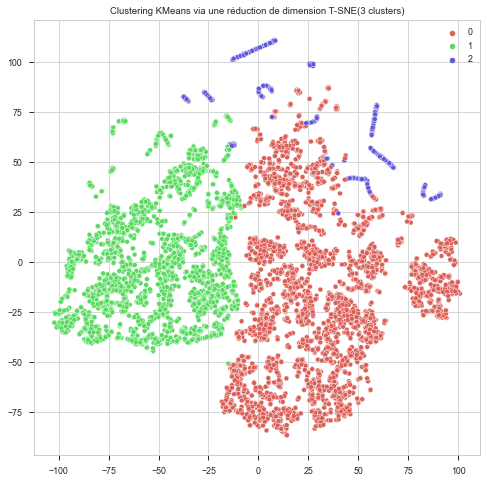

In [37]:
# Clustering KMEANS via une réduction de dimension T-SNE (3 clusters)
plt.figure(figsize=(8,8))
plt.title('Clustering KMeans via une réduction de dimension T-SNE(3 clusters)')
sns.scatterplot(T[:,0], 
                T[:,1],
               hue=dict_kmeans[(1,3)].labels_,
                legend='full',
               palette=sns.color_palette("hls",3))
plt.show()

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


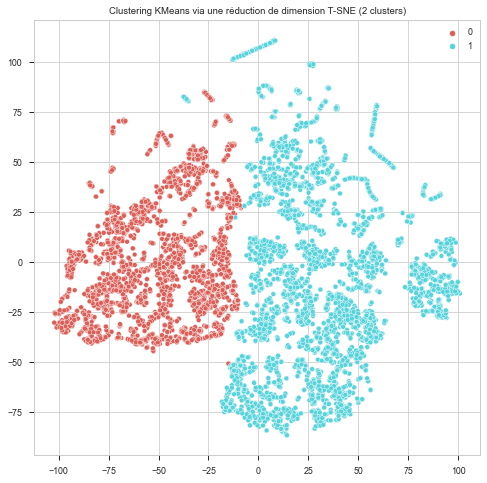

In [38]:
# Clustering KMEANS via une réduction de dimension T-SNE (2 clusters)
plt.figure(figsize=(8,8))
plt.title('Clustering KMeans via une réduction de dimension T-SNE (2 clusters)')
sns.scatterplot(T[:,0], 
                T[:,1],
               hue=dict_kmeans[(1,2)].labels_,
                legend='full',
               palette=sns.color_palette("hls",2))
plt.show()

## 3.2. DBSCAN

### 3.2.1. Réduction de dimension T-SNE

In [41]:
X1=X.copy()

In [42]:
tsne = manifold.TSNE(n_components=2, init='pca')
T = tsne.fit_transform(X1)

### 3.2.2. Fine tuning des hyperparamètres

In [43]:
%%time
dbs = DBSCAN(eps = 0.3, 
             min_samples=10,
               n_jobs=-1).fit(X)

Wall time: 376 ms


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


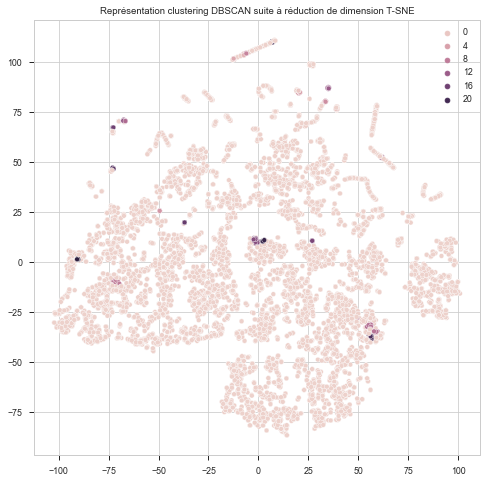

In [44]:
# Représentation clustering DBSCAN suite à réduction de dimension T-SNE
plt.figure(figsize=(8,8))
plt.title('Représentation clustering DBSCAN suite à réduction de dimension T-SNE')
sns.scatterplot(T[:,0], T[:,1], dbs.labels_)
plt.show()

### 3.2.3. Calcul des metrics d'évaluation

In [45]:
centers = [[1, 1], [-1, -1], [1, -1]]
X1, labels_true = make_blobs(n_samples=10000, centers=centers, cluster_std=0.25,
                            random_state=0)

In [46]:
# Evaluation metrics : 
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X1, labels))

Estimated number of clusters: 3
Estimated number of noise points: 1
Homogeneity: 0.999
Completeness: 0.998
V-measure: 0.999
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 0.999
Silhouette Coefficient: 0.712


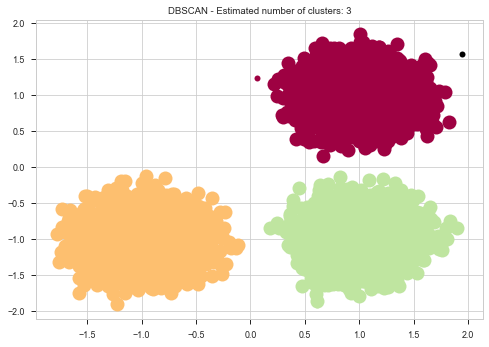

In [47]:
# plot the clusters

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN - Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 4. Interprétation des Clusters

In [48]:
nb_clusters = 3
if False:
    tsne = TSNE(n_components=2)
    T = tsne.fit_transform(X)
    graph = pd.DataFrame(data = [T[:,0], T[:,1], kmeans.labels_]).T
    graph.columns = ['X', 'Y', 'label']
    plt.figure(figsize=(10,10))
    plt.title('Clustering du KMEANS via réduction de dimension T-SNE')
    sns.scatterplot(graph['X'], graph['Y'], hue = graph['label'], legend='full',
                   palette=sns.color_palette("hls",3),
                    alpha=1, s=15,)
    plt.legend(loc='upper left', labels=graph['label'].unique())
    plt.show()
    
else:
        graph = pd.DataFrame(data = [kmeans.labels_]).T
        graph.columns = ['label']

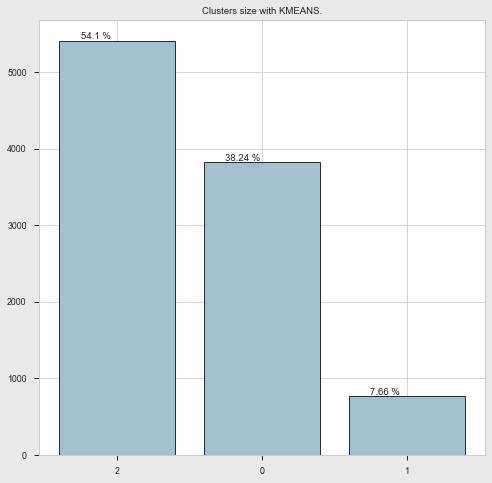

In [49]:
labs=kmeans.labels_

# Affichage de la taille de chaque cluster
cluster_size={}
for i in labs:
    if i not in cluster_size:
        cluster_size[i]=1
    else:
        cluster_size[i]+=1

fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Clusters size with KMEANS.") 
plt.bar(range(0,len(cluster_size)),cluster_size.values(),color="#a1c2cc",edgecolor='black')
for i,num in enumerate(cluster_size.keys()):
    height=cluster_size[num]+20
    x=i-0.25
    pourcent=cluster_size[num]/labs.shape[0]*100
    plt.text(x,height,"{} % ".format(round(pourcent,2)))
plt.xticks(range(0,len(cluster_size)),cluster_size.keys())
plt.show()

In [50]:
df=data_reduced.copy()

In [51]:
df["N° cluster"]=labs

In [52]:
df.head()

,customer_id,region,payment_sequential,payment_installments,nb_product,best_category,orders_tot_amount,freight_tot_value,review_mean_score,prefered_payment_type,customer_seniority,delivery_delay,N° cluster
133584,8a2fbe2c86f7f87cb8c663b48051c780,sud_est,1,1,1,home,41.99,19.32,3.0,credit_card,262,12,2
85546,4dc417fbc348bf334bb2d066ab22efa1,sud_est,1,1,6,home,780.00,140.94,1.0,boleto,192,13,2
90950,6c1433334b9652a4b751fe18aaaf4225,sud,1,3,4,home,95.96,108.32,5.0,credit_card,64,15,2
376,c8b7d6f94ed82f63ec835ef1af699c1f,sud_est,2,1,3,office,527.70,91.08,4.0,voucher,306,70,2
164312,d22f25a9fadfb1abbc2e29395b1239f4,centre_ouest,3,1,24,computers_electronics,359.76,529.44,3.0,voucher,3,20,0


In [53]:
dic_customer={}
for i in cluster_size.keys():
    d=df.loc[df["N° cluster"]==i]
    dic_customer[i]=list(d["customer_id"].unique())

def give_cluster(num):
    for i in dic_customer.keys():
        if num in dic_customer[i]:
            return i

In [54]:
df["N° cluster"]=df["customer_id"].apply(give_cluster)

In [55]:
def extract_pourcent(df,list_top3,var):
    dict_freq={}
    N=df.shape[0]
    for i in list_top3:
        d=df.loc[df[var]==i]
        n=d.shape[0]/N*100
        dict_freq[i]=round(n,1)
    return dict_freq

def most_pop(variable,cluster):
    d=df.loc[df["N° cluster"]==cluster]
    cat_list=list(d[variable].values)
    cat_counter = {}
    for word in cat_list:
        if word in cat_counter:
            cat_counter[word] += 1
        else:
            cat_counter[word] = 1

    popular_cat = sorted(cat_counter, key = cat_counter.get, reverse = True)
    top_4 = popular_cat[:4]
    top_4=extract_pourcent(d,top_4,variable)
    return top_4

In [58]:
def cluster_analysis(n_cluster):
    the_cluster=n_cluster
    popular_cat=most_pop("best_category",the_cluster)
    popular_state=most_pop("region",the_cluster)
    popular_payment_type=most_pop("prefered_payment_type",the_cluster)

    fig=plt.figure(1,figsize=[19,5])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)

    plt.suptitle("Clusters N° {}: {} customers.".format(the_cluster,cluster_size[the_cluster]),size=15)
    plt.subplot(1,3,1)
    plt.title("Top of product category")
    plt.bar(range(0,len(popular_cat)),popular_cat.values(),edgecolor='black')
    plt.xticks(range(0,len(popular_cat)),popular_cat.keys(),rotation=45)
    plt.ylabel("Percentage")

    plt.subplot(1,3,2)
    plt.title("Top of Region of residence")
    plt.bar(range(0,len(popular_state)),popular_state.values(),edgecolor='black')
    plt.xticks(range(0,len(popular_state)),popular_state.keys())

    plt.subplot(1,3,3)
    plt.title("Top of Prefered payment type")
    plt.bar(range(0,len(popular_payment_type)),popular_payment_type.values(),edgecolor='black')
    plt.xticks(range(0,len(popular_payment_type)),popular_payment_type.keys(),rotation=45)
    plt.show()

In [59]:
print(df["N° cluster"].unique())

[2 0 1]


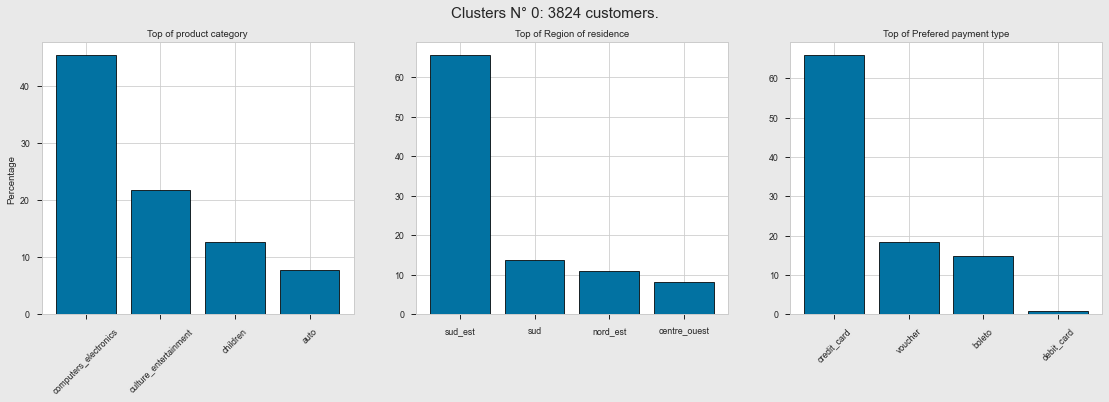

In [60]:
cluster_analysis(0)

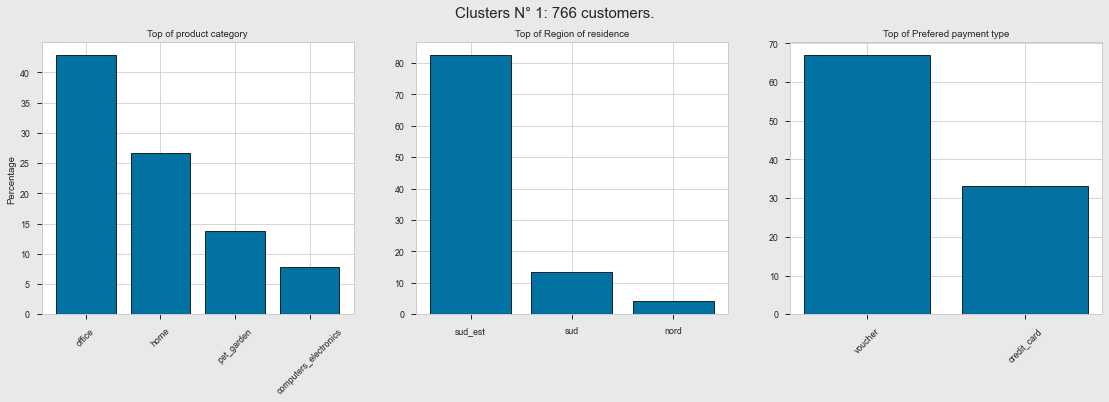

In [61]:
cluster_analysis(1)

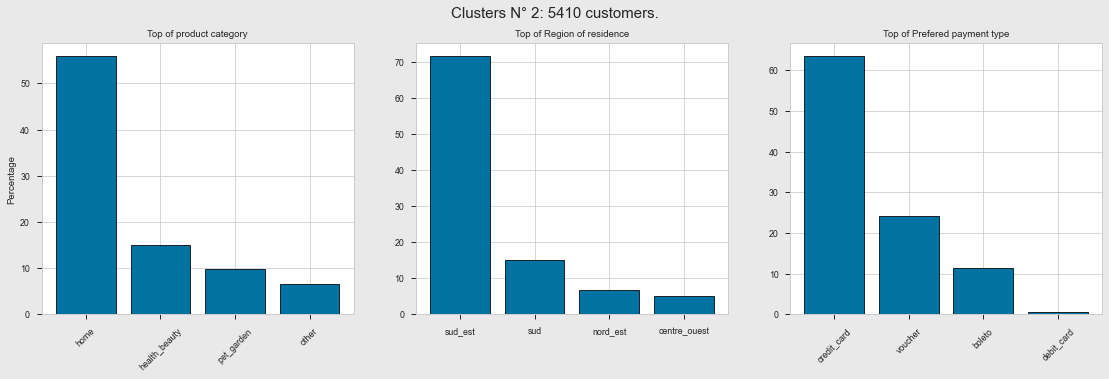

In [62]:
cluster_analysis(2)

In [63]:
df.columns

Index(['customer_id', 'region', 'payment_sequential', 'payment_installments',
       'nb_product', 'best_category', 'orders_tot_amount', 'freight_tot_value',
       'review_mean_score', 'prefered_payment_type', 'customer_seniority',
       'delivery_delay', 'N° cluster'],
      dtype='object')

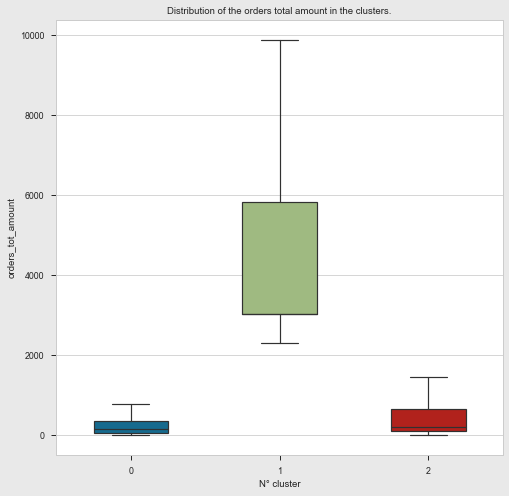

In [64]:
# Distribution de la variable orders_mean_amount dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the orders total amount in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="orders_tot_amount",width=0.5,showfliers=False)
plt.show()

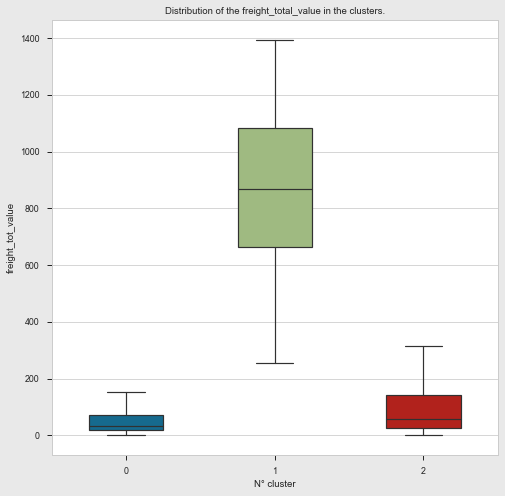

In [65]:
# Distribution de la variable freight_mean_value dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the freight_total_value in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="freight_tot_value",width=0.5,showfliers=False)
plt.show()

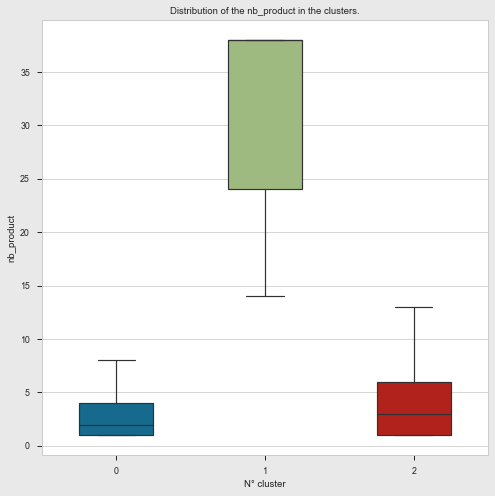

In [66]:
# Distribution de la variable nb_product_mean dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the nb_product in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="nb_product",width=0.5,showfliers=False)
plt.show()

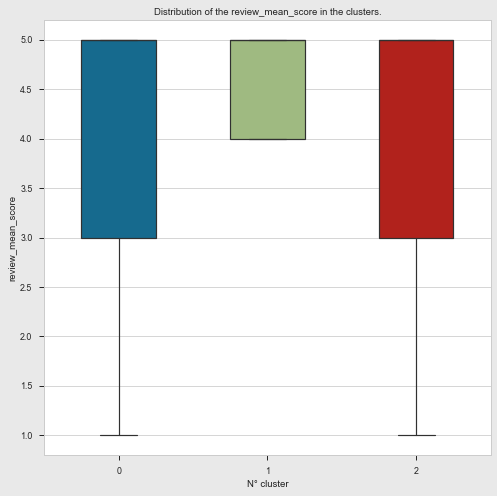

In [67]:
# Distribution de la variable review_mean_score dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the review_mean_score in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="review_mean_score",width=0.5,showfliers=False)
plt.show()

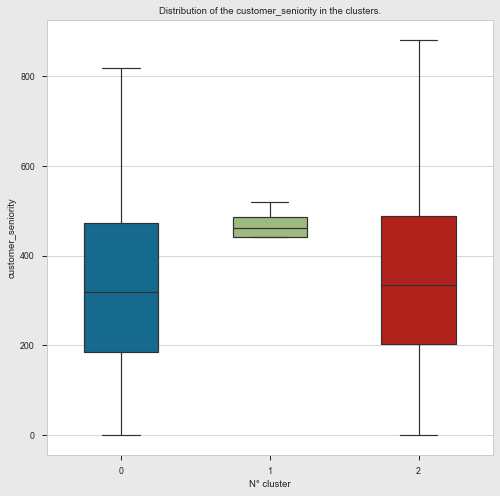

In [68]:
# Distribution de la variable customer_seniority dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the customer_seniority in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="customer_seniority",width=0.5,showfliers=False)
plt.show()

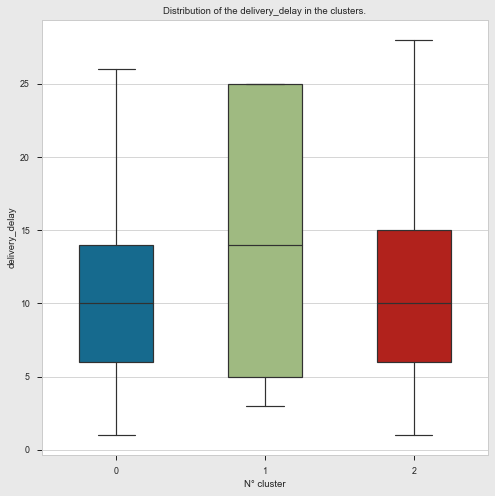

In [69]:
# Distribution de la variable delivery_delay dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the delivery_delay in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="delivery_delay",width=0.5,showfliers=False)
plt.show()

********************************************************************************************************************************

# 5. Application sur l'ensemble du Dataset

In [73]:
data.columns

Index(['customer_id', 'region', 'payment_sequential', 'payment_installments',
       'nb_product', 'best_category', 'orders_tot_amount', 'freight_tot_value',
       'review_mean_score', 'prefered_payment_type', 'customer_seniority',
       'delivery_delay'],
      dtype='object')

In [74]:
# Définition du dataset
data_tot = data.copy()
X2 = data_tot.drop('customer_id',axis=1)

In [75]:
# Label encoding des données catégorielles et Standard Scaler des données
Label_Encoder(X2)


,region,payment_sequential,payment_installments,nb_product,best_category,orders_tot_amount,freight_tot_value,review_mean_score,prefered_payment_type,customer_seniority,delivery_delay
0,4,1,2,1,9,124.99,21.88,4.0,1,571,8
1,1,1,1,2,9,225.98,49.80,1.0,1,453,18
2,1,1,1,2,9,225.98,49.80,1.0,1,453,18
3,1,1,1,2,9,225.98,49.80,1.0,1,453,18
4,1,1,1,2,9,225.98,49.80,1.0,1,453,18
...,...,...,...,...,...,...,...,...,...,...,...
287472,4,2,1,2,8,258.00,52.36,5.0,3,495,9
287473,4,2,1,2,8,258.00,52.36,5.0,1,495,9
287474,4,2,1,2,8,258.00,52.36,5.0,1,495,9
287475,4,2,1,2,8,258.00,52.36,5.0,1,495,9


In [76]:
StandardScaler(X2)

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass copy=        region  payment_sequential  payment_installments  nb_product  \
0            4                   1                     2           1   
1            1                   1                     1           2   
2            1                   1                     1           2   
3            1                   1                     1           2   
4            1                   1                     1           2   
...        ...                 ...                   ...         ...   
287472       4                   2                     1           2   
287473       4                   2                     1           2   
287474       4                   2                     1           2   
287475       4                   2                     1           2   
287476       4                   2                     1           2   

        best_category

StandardScaler(copy=        region  payment_sequential  payment_installments  nb_product  \
0            4                   1                     2           1   
1            1                   1                     1           2   
2            1                   1                     1           2   
3            1                   1                     1           2   
4            1                   1                     1           2   
...        ...                 ...                   ...         ...   
287472       4                   2                     1           2   
287473       4                   2                     1           2   
287474       4                   2                     1           2   
287475       4                   2                     1           2   
287476       4                   2                     1           2   

        best_category  orders_tot_amount  freight_tot_value  \
0                   9             124.99            

In [81]:
kmeans = KMeans(
         init="k-means++",
         n_clusters=3,
         n_init=20,
         max_iter=50,
         n_jobs=-1,
         random_state=42)

In [82]:
%%time
kmeans.fit(X2)

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Wall time: 3.46 s


KMeans(max_iter=50, n_clusters=3, n_init=20, n_jobs=-1, random_state=42)

In [83]:
nb_clusters = 3
if False:
    tsne = TSNE(n_components=2)
    T = tsne.fit_transform(X2)
    graph = pd.DataFrame(data = [T[:,0], T[:,1], kmeans.labels_]).T
    graph.columns = ['X', 'Y', 'label']
    plt.figure(figsize=(10,10))
    plt.title('Clustering du KMEANS via réduction de dimension T-SNE')
    sns.scatterplot(graph['X'], graph['Y'], hue = graph['label'], legend='full',
                   palette=sns.color_palette("hls",3),
                    alpha=1, s=15,)
    plt.legend(loc='upper left', labels=graph['label'].unique())
    plt.show()
    
else:
        graph = pd.DataFrame(data = [kmeans.labels_]).T
        graph.columns = ['label']

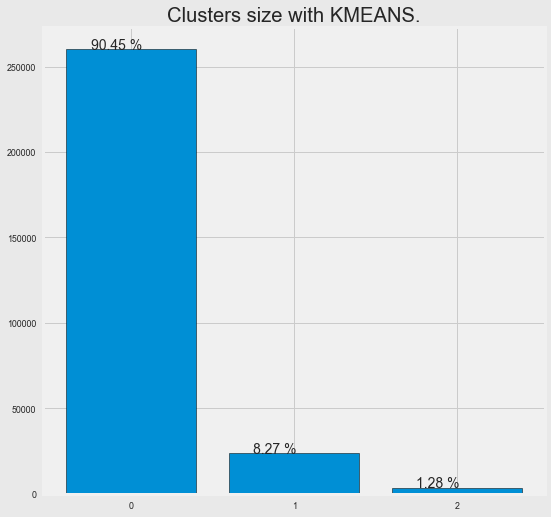

In [84]:
labs=kmeans.labels_

# Affichage de la taille de chaque cluster
cluster_size={}
for i in labs:
    if i not in cluster_size:
        cluster_size[i]=1
    else:
        cluster_size[i]+=1

fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Clusters size with KMEANS.") 
plt.bar(range(0,len(cluster_size)),cluster_size.values(),edgecolor='black')
for i,num in enumerate(cluster_size.keys()):
    height=cluster_size[num]+20
    x=i-0.25
    pourcent=cluster_size[num]/labs.shape[0]*100
    plt.text(x,height,"{} % ".format(round(pourcent,2)))
plt.xticks(range(0,len(cluster_size)),cluster_size.keys())
plt.show()

In [85]:
df=data_tot.copy()

In [86]:
df["N° cluster"]=labs

In [87]:
df["N° cluster"]=df["customer_id"].apply(give_cluster)

In [88]:
print(df["N° cluster"].unique())

[nan  2.  1.  0.]


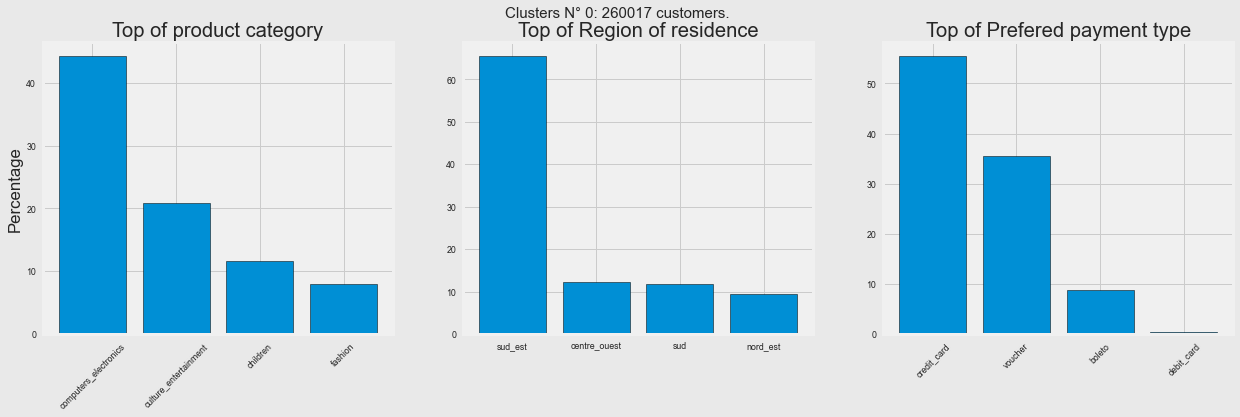

In [89]:
cluster_analysis(0)

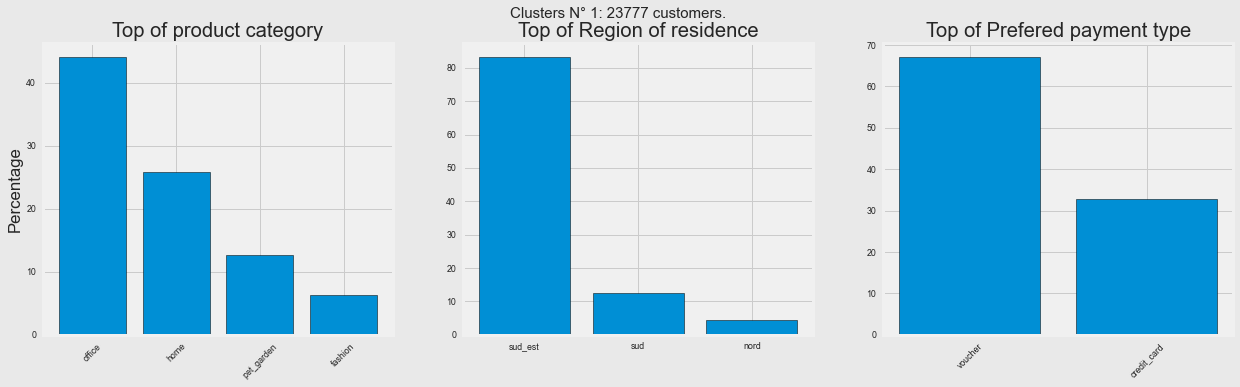

In [90]:
cluster_analysis(1)

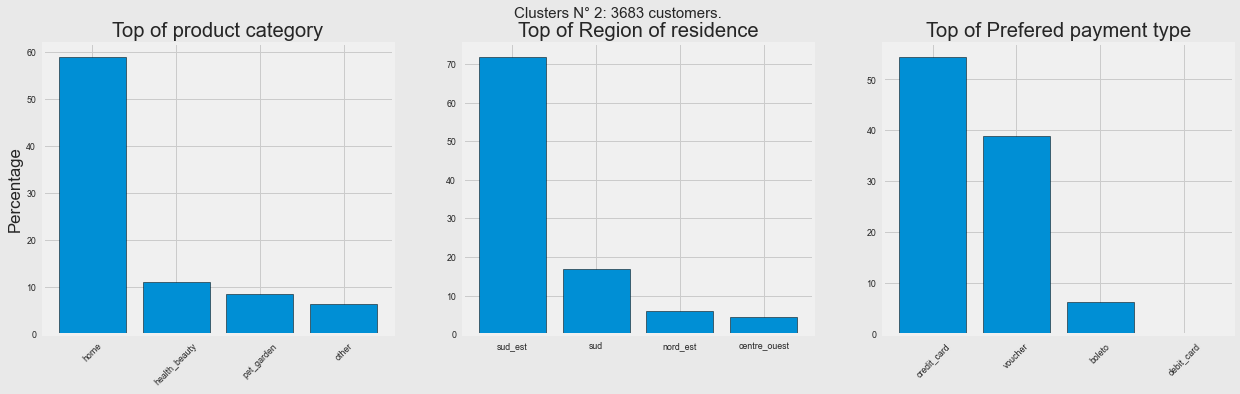

In [91]:
cluster_analysis(2)

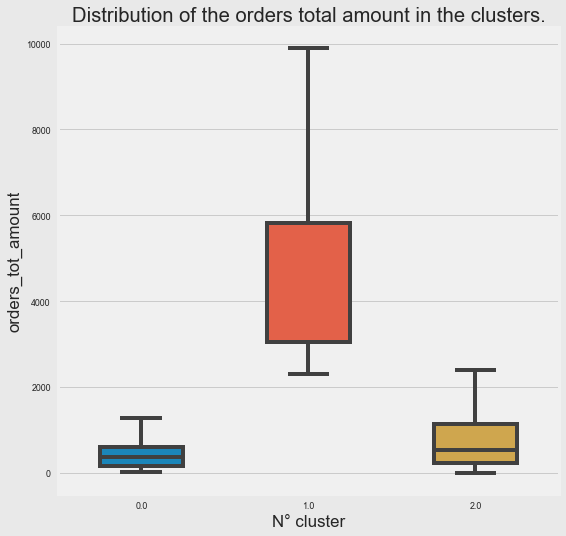

In [92]:
# Distribution de la variable orders_mean_amount dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the orders total amount in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="orders_tot_amount",width=0.5,showfliers=False)
plt.show()

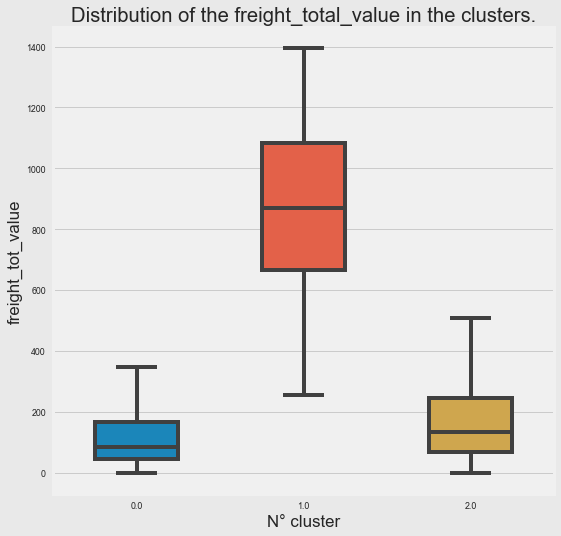

In [93]:
# Distribution de la variable freight_mean_value dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the freight_total_value in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="freight_tot_value",width=0.5,showfliers=False)
plt.show()

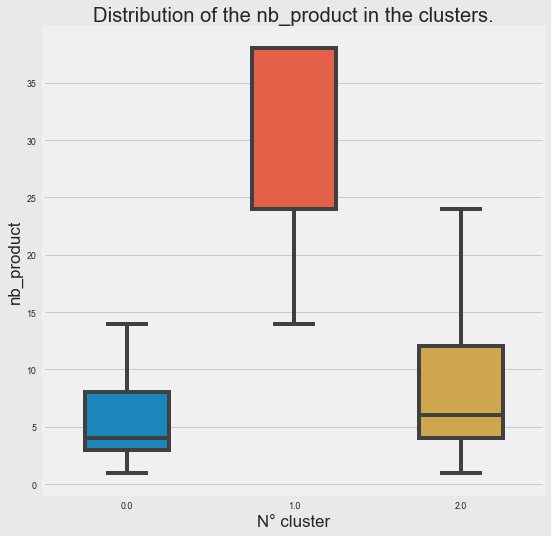

In [94]:
# Distribution de la variable nb_product_mean dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the nb_product in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="nb_product",width=0.5,showfliers=False)
plt.show()

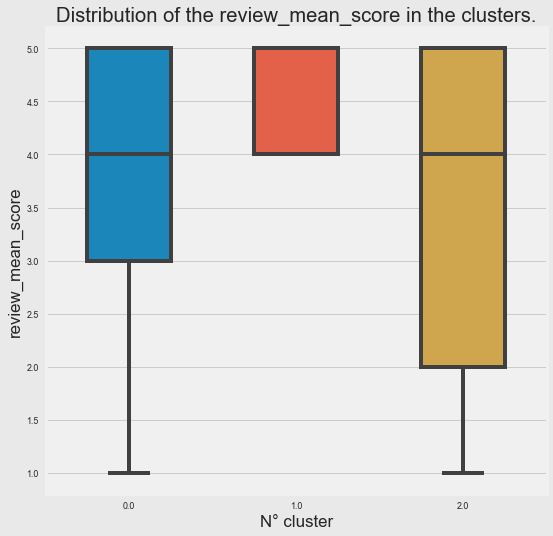

In [95]:
# Distribution de la variable review_mean_score dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the review_mean_score in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="review_mean_score",width=0.5,showfliers=False)
plt.show()

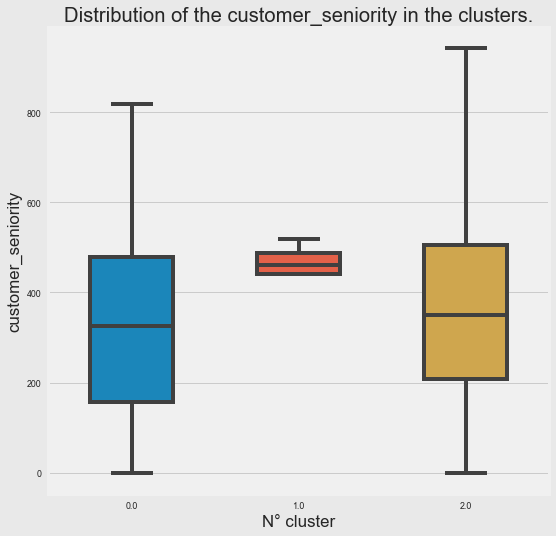

In [96]:
# Distribution de la variable customer_seniority dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the customer_seniority in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="customer_seniority",width=0.5,showfliers=False)
plt.show()

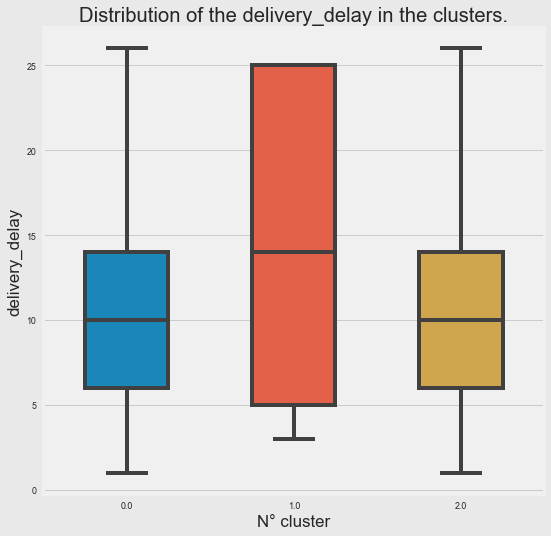

In [97]:
# Distribution de la variable delivery_delay dans les clusters
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the delivery_delay in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="delivery_delay",width=0.5,showfliers=False)
plt.show()